Generated fake_images/fake_11.jpg
Generated fake_images/fake_1.jpg
Generated fake_images/fake_12.jpg
Generated fake_images/fake_14.jpg
Generated fake_images/fake_3.jpg
Generated fake_images/fake_9.jpg
Generated fake_images/fake_7.jpg
Generated fake_images/fake_8.jpg
Generated fake_images/fake_6.jpg
Generated fake_images/fake_17.jpg
Generated fake_images/fake_2.jpg
Generated fake_images/fake_4.jpg
Generated fake_images/fake_5.jpg
Generated fake_images/fake_19.jpg
Generated fake_images/fake_16.jpg
Generated fake_images/fake_18.jpg
Generated fake_images/fake_13.jpg
Generated fake_images/fake_0.jpg
Generated fake_images/fake_15.jpg
Generated fake_images/fake_10.jpg
Generated 20 fake images.


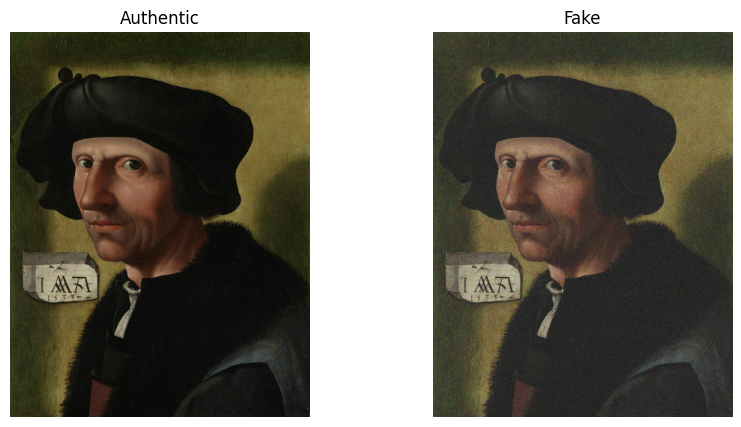

In [12]:
import albumentations as A
import cv2
import os
from glob import glob

# Ensure fake_images directory exists
os.makedirs('fake_images', exist_ok=True)
fake_images = []
fake_labels = []

# Updated augmentation pipeline
transform = A.Compose([
    A.GaussianBlur(blur_limit=(3, 7), p=0.7),  # Stronger blur to mimic poor photo
    A.GaussNoise(p=0.7),  # Use default noise settings, increase probability
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),  # Stronger contrast
    A.Rotate(limit=15, p=0.5),  # Slightly larger rotation
])

# Process authentic images
authentic_images = glob('authentic_images/authentic_*.jpg')
for path in authentic_images:
    image = cv2.imread(path)
    if image is None:
        print(f"Failed to load {path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    augmented = transform(image=image)['image']
    fake_path = path.replace('authentic_images', 'fake_images').replace('authentic', 'fake')
    cv2.imwrite(fake_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))
    fake_images.append(fake_path)
    fake_labels.append(0)  # Fake
    print(f"Generated {fake_path}")

print(f"Generated {len(fake_images)} fake images.")

# Visualize one pair
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(authentic_images[0]), cv2.COLOR_BGR2RGB))
plt.title("Authentic")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cv2.imread(fake_images[0]), cv2.COLOR_BGR2RGB))
plt.title("Fake")
plt.axis('off')
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# Combine authentic and fake images
authentic_images = glob('authentic_images/authentic_*.jpg')
authentic_labels = [1] * len(authentic_images)
fake_images = glob('fake_images/fake_*.jpg')
fake_labels = [0] * len(fake_images)

all_paths = authentic_images + fake_images
all_labels = authentic_labels + fake_labels
df = pd.DataFrame({'image_path': all_paths, 'label': all_labels})
print(df.head())

# Split 80/20
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)
print(f"Train: {len(train_df)}, Test: {len(test_df)}")

# Download CSVs
from google.colab import files
files.download('train.csv')
files.download('test.csv')

                          image_path  label
0  authentic_images/authentic_11.jpg      1
1   authentic_images/authentic_1.jpg      1
2  authentic_images/authentic_12.jpg      1
3  authentic_images/authentic_14.jpg      1
4   authentic_images/authentic_3.jpg      1
Train: 32, Test: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>